In [3]:
# !nvidia-smi
# !pip install seaborn

In [1]:
import re
import os
import pandas as pd
import numpy as np
import json
from pathlib import Path
from glob import glob
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pickle
def writePickle(file_path, sth):
    # store list in binary file so 'wb' mode
    with open(file_path, 'wb') as fp:
        pickle.dump(sth, fp)

def loadPickle(file_path):
    # for reading also binary mode is important
    with open(file_path, 'rb') as fp:
        return pickle.load(fp)

import sys
sys.path.append("/home/privacy/")
import icd9_obj 
icd9obj = icd9_obj.ICD9_obj()

import lineTool
def lineMSG(pushMsg):
    token = 'Sv0neOgZSZVmh7YFm2SGvnjpanXFa4OoIJ8ISmJvnlO'
    # Sv0neOgZSZVmh7YFm2SGvnjpanXFa4OoIJ8ISmJvnlO
    lineTool.lineNotify(token, pushMsg)

In [3]:
# os.system('nvidia-smi')

In [4]:
# import torch
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"
# device = "cuda" if torch.cuda.is_available() else "CPU"
# print(device)

cuda


In [2]:
def getCategory(fn):
    
    data_type = 'reid'; gener_type = 'Oneshot'; model = 'GPT-35'
    if 'deid' in fn: data_type = 'deid'
    if 'keyword' in fn: 
        gener_type = 'Keyword'
    elif 'one_shot_src' in fn:
        gener_type = 'Normalized Oneshot'
    if 'gpt-4' in fn:
        model = 'GPT-4'
    elif 'Mistral7b' in fn:
        model = 'Mistral7b'
    return data_type, gener_type, model

# fn = os.path.basename(pk_fn).replace('.pickle', '')
# print(fn, getCategory(fn))

In [3]:
root = r'/home/privacy/data/MIMIC3'

data_type_ls = ['reid', 'deid']
data_type = data_type_ls[0]

src_data_dict = {
    'reid': r'/home/privacy/data/MIMIC_reid_val_record_20230704/',
    'deid': r'/home/privacy/data/MIMICIII_ori_nosp/',
}

prompt_dir = os.path.join( root, f'src_{data_type}', 'output_csv_4k_n')

generation_ls = ['one_shot', 'keyword', 'one_shot_src']
generation_type = 'one_shot'
TOT_NUM = 9817

model_ls = [ 'gpt-35-turbo-a0301',  'gpt-4-0613', 'Mistral7b']
model = model_ls[0]

NORMAL4K = 'normal4k'
OUTPUT_DIR = 'output_csv_4k_n'

# Check on similarity
## Comparison type **1** vs **1**
- syn notes vs src notes
- normalized + 4k: syn vs src

## Calculate ROUGE

In [4]:
from rouge_score import rouge_scorer

In [4]:
result_dir = r'./util_eval/rouge'
Path(result_dir).mkdir(parents=True, exist_ok=True)

rouge_name_ls = ['rouge1', 'rouge2', 'rouge3', 'rougeL']
rouge_col_ls = ['precision', 'recall', 'fmeasure']
prefix_str = 'Write a description of a patient using 2250 words containing the following phrases sequentially:\n'
postfix_str = '.\n###'

In [9]:
# from rouge_score import rouge_scorer
# result_dir = r'./util_eval/rouge'
# Path(result_dir).mkdir(parents=True, exist_ok=True)

# rouge_name_ls = ['rouge1', 'rouge2', 'rouge3', 'rougeL']
# rouge_col_ls = ['precision', 'recall', 'fmeasure']
# prefix_str = 'Write a description of a patient using 2250 words containing the following phrases sequentially:\n'
# postfix_str = '.\n###'

### Syn notes vs src notes

#### Combine

In [ ]:
for data_type in data_type_ls:
    # data_type = 'deid'
    # data_type = 'reid'
    src_note_dir = src_data_dict[data_type]
    for generation_type in generation_ls:
        for model in model_ls:
            task_name = f'{data_type}_{generation_type}_{model}'
            print(task_name)
            prompt_dir = os.path.join( root, f'src_{data_type}',OUTPUT_DIR)
            
            generation_dir = os.path.join(prompt_dir, generation_type, model)
            syn_fls = [f'{icd9_abbr}_{fn}' for icd9_abbr in icd9obj.ICD9_ABBR_LS for fn in os.listdir(os.path.join(generation_dir, icd9_abbr))]
            # prep for dataframe
            df = pd.DataFrame(index=syn_fls)
            rouge_pair_dict = {}
            for r_name in rouge_name_ls:
                rouge_pair_dict[r_name] = df.copy()
            
            scorer = rouge_scorer.RougeScorer(rouge_name_ls, use_stemmer=True)
            rougue_pickle_fp = os.path.join(result_dir, f'{task_name}.pickle')
            for syn_comb in syn_fls:
                syn_icd9_abbr,_, syn_fn = syn_comb.split('_')
                # read SRC fn
                with open(os.path.join(src_note_dir, syn_icd9_abbr, syn_fn), 'r') as fr:
                    src_corpus = fr.read()
    
                # read SYN fn
                with open(os.path.join(generation_dir, syn_icd9_abbr, f'syn_{syn_fn}'), 'r') as fr:
                    syn_corpus = fr.read()
    
                scores = scorer.score(src_corpus, syn_corpus)
                for r_name, scores_obj in scores.items(): # ['rouge1', 'rouge2', 'rouge3', 'rougeL']
                    for rouge_col in rouge_col_ls:
                        rouge_pair_dict[r_name].loc[syn_comb, rouge_col] = eval(f'scores_obj.{rouge_col}')

            writePickle(rougue_pickle_fp, rouge_pair_dict)
            lineMSG(f'72\nCheck on similarity {task_name} done!')

reid_one_shot_gpt-35-turbo-a0301


-End of Combine
#### Single

In [15]:
data_type = 'reid'
prompt_dir = os.path.join( root, f'src_{data_type}', 'output_csv_4k_n')
for generation_type in generation_ls:
    for model in model_ls:
        task_name = f'{data_type}_{generation_type}_{model}'
        print(task_name)
        1/0

reid_one_shot_gpt-35-turbo-a0301


ZeroDivisionError: division by zero

In [20]:
for icd9_abbr in icd9obj.ICD9_ABBR_LS[:1]:
    syn_fls = os.listdir(os.path.join(prompt_dir, generation_type, model, icd9_abbr))
    
    ky_pickle = os.path.join( prompt_dir, f'keyword_{icd9_abbr}.pickle') # contains src notes
    src_collect = loadPickle(ky_pickle)

In [24]:
for syn_fn in syn_fls[:1]:
    src_fn = syn_fn.replace('syn_', '')
    print(syn_fn, src_fn)

syn_88116.txt 88116.txt


In [6]:
from rouge_score import rouge_scorer
result_dir = r'./util_eval/rouge'
Path(result_dir).mkdir(parents=True, exist_ok=True)

rouge_name_ls = ['rouge1', 'rouge2', 'rouge3', 'rougeL']
rouge_col_ls = ['precision', 'recall', 'fmeasure']
prefix_str = 'Write a description of a patient using 2250 words containing the following phrases sequentially:\n'
postfix_str = '.\n###'
OUTPUT_DIR = 'output_csv_4k_n'
fls = ['valid.csv', 'train.csv', 'test.csv']

In [18]:
data_type = 'reid'
for generation_type in generation_ls:
    prompt_dir = os.path.join( root, f'src_{data_type}', 'output_csv_4k_n')
    for model in model_ls:
        task_name = f'{data_type}_{generation_type}_{model}'
        
        print(task_name)
        1/0

reid_one_shot_gpt-35-turbo-a0301


ZeroDivisionError: division by zero

In [8]:
generation_dir = os.path.join(prompt_dir, generation_type, model, OUTPUT_DIR)

syn_df_ls = [pd.read_csv(os.path.join(generation_dir, fn)) for fn in fls if 'ipynb' not in fn]

syn_df = pd.concat(syn_df_ls, ignore_index=True)

print(syn_df.shape)
del syn_df_ls
if syn_df.shape[0] != icd9obj.TOT_NUM: print('Total number is less then 9817')
syn_df['icd9_fn'] = syn_df['Three_Character_Labels'] + '_' + syn_df['Admission_Id'].astype('str')+ '.txt'

(9802, 4)
Total number is less then 9817


In [12]:
# prep for dataframe

df = pd.DataFrame(index=syn_df.icd9_fn.to_list())
rouge_pair_dict = {}
for r_name in rouge_name_ls:
    rouge_pair_dict[r_name] = df.copy()

rougue_pickle_fp = os.path.join(result_dir, f'{task_name}_notes_level.pickle')
print(rougue_pickle_fp)

./util_eval/rouge/reid_one_shot_gpt-35-turbo-a0301_notes_level.pickle


In [18]:
scorer = rouge_scorer.RougeScorer(rouge_name_ls, use_stemmer=True)

for icd9_abbr in icd9obj.ICD9_ABBR_LS[:]:
    ky_pickle = os.path.join( prompt_dir, f'keyword_{icd9_abbr}.pickle') # contains src notes
    src_collect = loadPickle(ky_pickle)
    
    data_pd = syn_df[syn_df.Full_Labels== icd9_abbr] # synthetic
    
    for k in data_pd.index:
        syn_keyword = data_pd.loc[k,'Text'].replace('\n', ', ')
        idx = data_pd.loc[k, 'icd9_fn']
        fn = data_pd.loc[k,'Admission_Id']
        src_keyword = src_collect[f'{fn}.txt'][0].replace(prefix_str, '').replace(postfix_str, '')
        scores = scorer.score(src_keyword, syn_keyword)
        1/0
        for r_name, scores_obj in scores.items(): # ['rouge1', 'rouge2', 'rouge3', 'rougeL']
            for rouge_col in rouge_col_ls:
                rouge_pair_dict[r_name].loc[idx, rouge_col] = eval(f'scores_obj.{rouge_col}')
    writePickle(os.path.join(result_dir, f'{task_name}.pickle'), rouge_pair_dict)
lineMSG(f'72\nCheck on similarity {task_name} done!')

ZeroDivisionError: division by zero

### Normalized + 4k: Syn text vs src text

In [6]:
from rouge_score import rouge_scorer
result_dir = r'./util_eval/rouge/normalized_txt'
Path(result_dir).mkdir(parents=True, exist_ok=True)

rouge_name_ls = ['rouge1', 'rouge2', 'rouge3', 'rougeL']
rouge_col_ls = ['precision', 'recall', 'fmeasure']
prefix_str = 'Write a description of a patient using 2250 words containing the following phrases sequentially:\n'
postfix_str = '.\n###'
OUTPUT_DIR = 'output_csv_4k_n'

In [ ]:
# for data_type in data_type_ls:
#     data_type = 'deid'
data_type = 'reid'
src_note_dir = src_data_dict[data_type]

src_output_dir = os.path.join( src_note_dir, OUTPUT_DIR)
src_df_ls = [pd.read_csv(os.path.join(src_output_dir, fn)) for fn in ['valid.csv', 'train.csv', 'test.csv'] if 'ipynb' not in fn]
src_df = pd.concat(src_df_ls, ignore_index=True)
del src_df_ls
src_df['icd9_fn'] = src_df['Three_Character_Labels'] + '_' + src_df['Admission_Id'].astype('str')+ '.txt'

for generation_type in generation_ls:
    for model in model_ls:
        task_name = f'{data_type}_{generation_type}_{model}_nor4k_txt'
        print(task_name)
        rougue_pickle_fp = os.path.join(result_dir, f'{task_name}.pickle')
        
        prompt_dir = os.path.join( root, f'src_{data_type}',OUTPUT_DIR)
        generation_dir = os.path.join(prompt_dir, generation_type, model, OUTPUT_DIR)
        # continue
        syn_df_ls = [pd.read_csv(os.path.join(generation_dir, fn)) for fn in ['valid.csv', 'train.csv', 'test.csv'] if 'ipynb' not in fn]
        syn_df = pd.concat(syn_df_ls, ignore_index=True)
        del syn_df_ls
        syn_df['icd9_fn'] = syn_df['Three_Character_Labels'] + '_' + syn_df['Admission_Id'].astype('str')+ '.txt'
        # prep for dataframe
        df = pd.DataFrame(index=syn_df.icd9_fn.to_list())
        rouge_pair_dict = {}
        for r_name in rouge_name_ls:
            rouge_pair_dict[r_name] = df.copy()
        
        scorer = rouge_scorer.RougeScorer(rouge_name_ls, use_stemmer=True)
        
        for i in tqdm(range(syn_df.shape[0])):
            syn_normal4k, icd9fn = syn_df.loc[i, ['Text', 'icd9_fn']]
            src_normal4k = src_df[src_df.icd9_fn == icd9fn]['Text'].values[0]

            scores = scorer.score(src_normal4k, syn_normal4k)
            for r_name, scores_obj in scores.items(): # ['rouge1', 'rouge2', 'rouge3', 'rougeL']
                for rouge_col in rouge_col_ls:
                    rouge_pair_dict[r_name].loc[icd9fn, rouge_col] = eval(f'scores_obj.{rouge_col}')

        writePickle(rougue_pickle_fp, rouge_pair_dict)
        lineMSG(f'72\nCheck on similarity {task_name} done!')

reid_one_shot_gpt-35-turbo-a0301_nor4k_txt


100%|██████████████████████████████████████████████████████████████████████████| 9802/9802 [1:31:00<00:00,  1.80it/s]


reid_one_shot_gpt-4-0613_nor4k_txt


100%|████████████████████████████████████████████████████████████████████████████| 9806/9806 [53:33<00:00,  3.05it/s]


reid_one_shot_Mistral7b_nor4k_txt


 60%|█████████████████████████████████████████████▍                              | 5865/9817 [52:07<36:53,  1.79it/s]

### Print results

In [78]:
# full_df = full_df.sort_values(['data_type','rouge_type', 'gener_type', 'model'])

In [79]:
# full_df = full_df.transpose()

In [80]:
# full_df.to_csv(r'./util_eval/rouge/full_note.csv', index=False)

In [5]:
def getDf(fls):
    collect = []
    for pk_fn in fls[:]:
        fn = os.path.basename(pk_fn).replace('.pickle', '')
        data_type, gener_type, model = getCategory(fn)
        rouge_pair_dict = loadPickle(pk_fn)
        for k, v in rouge_pair_dict.items():
            collect.append([data_type, gener_type, model, k, v.precision.mean(), v.precision.std(), v.recall.mean(), v.recall.std(), v.fmeasure.mean(), v.fmeasure.std()])
    df = pd.DataFrame(collect, columns=['data_type', 'gener_type', 'model', 'rouge_type', 'precision', 'p-std', 'recall', 'r-std', 'f1', 'f1-std'])
    df.rouge_type = df.rouge_type.str.upper()
    df.loc[df.gener_type == 'Normalized Oneshot', 'gener_type'] = 'Normalized One-shot'
    df.loc[df.gener_type == 'Oneshot', 'gener_type'] = 'One-shot'
    return df

In [15]:
result_dir = r'./util_eval/rouge'
fls = glob(os.path.join(result_dir, '*.pickle'))
fls.sort(reverse=True)
print(len(fls))
full_df = getDf(fls)


result_dir = os.path.join(r'./util_eval/rouge/', NORMAL4K)
fls = glob(os.path.join(result_dir, '*.pickle'))
fls.sort(reverse=True)
len(fls)
normal_4k_df = getDf(fls)

18


In [46]:
# normal_4k_df

In [94]:
# target_metrics = 'f1'
# target_rouge = 'rouge1'
# subdf = df[(df.data_type == 'reid') & (df.rouge_type == target_rouge)]
# subdf = subdf[['gener_type', 'model', target_metrics]]

In [16]:
target_metrics = 'f1'
mapping_dict = {
    'precision': 'Precision', 'recall': 'Recall', 'f1': 'F1 Score'
}
target_output_metrics = mapping_dict[target_metrics]
def getSubdf(data_type, df):
    
    subdf = df[(df.data_type ==data_type)]
    subdf = subdf[['gener_type', 'model', 'rouge_type', target_metrics]]
    subdf = subdf.sort_values(['gener_type', 'rouge_type', 'model'])
    return subdf

# subdf = getSubdf('reid', full_df)

In [14]:
# full_df

Text(0.5, 0.98, 'Full Notes (DE-ID): Source vs Synthetic')

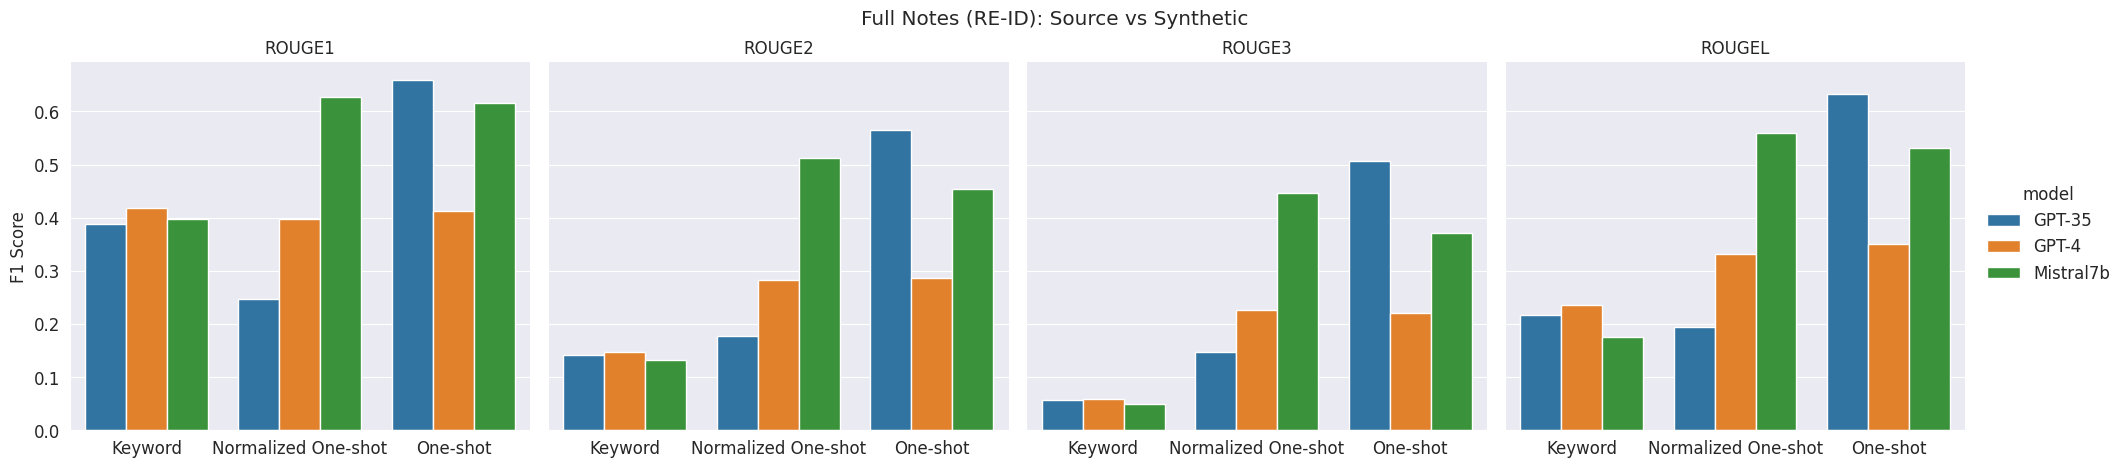

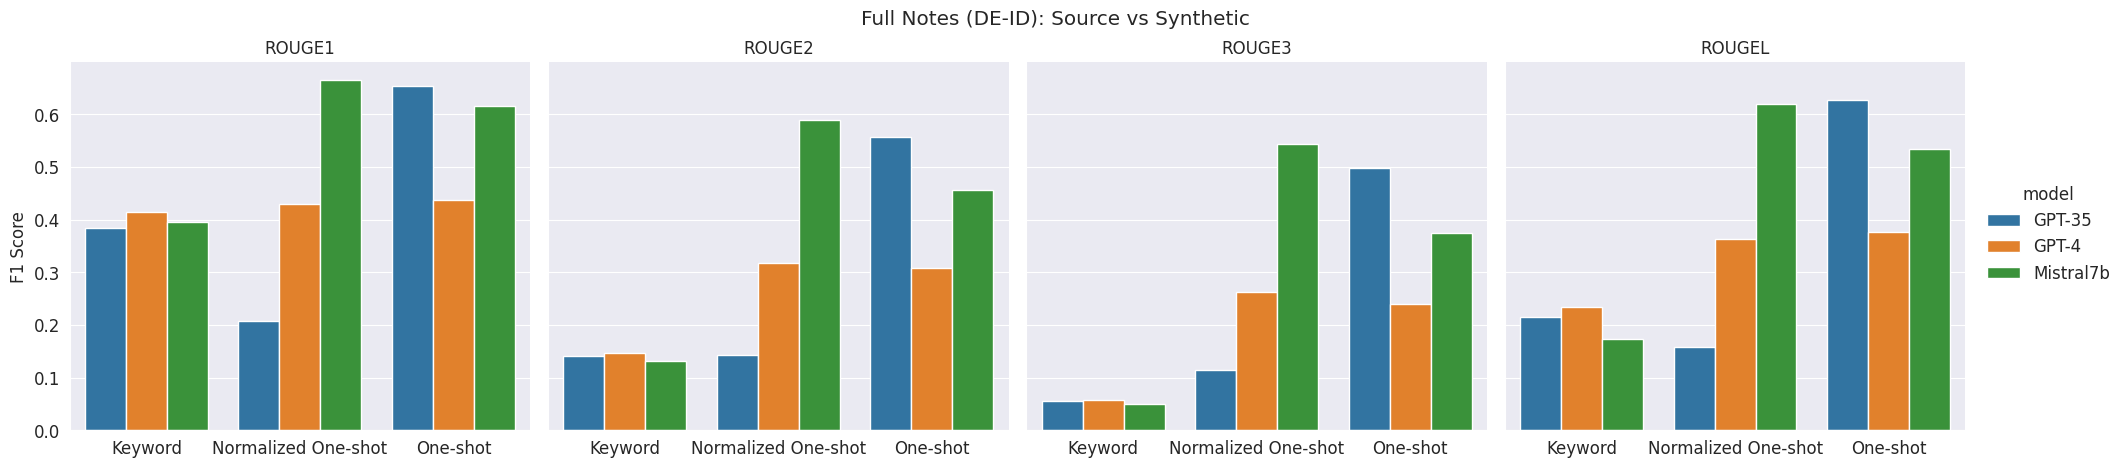

In [87]:
subdf = getSubdf('reid', full_df)
sns.set_style("darkgrid")
g = sns.catplot(data=subdf, kind="bar", x='gener_type', y=target_metrics, hue='model', col='rouge_type', aspect=1,)
g.set_axis_labels("", target_output_metrics)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.875) 
g.fig.suptitle('Full Notes (RE-ID): Source vs Synthetic')

subdf = getSubdf('deid', full_df)
sns.set_style("darkgrid")
g = sns.catplot(data=subdf, kind="bar", x='gener_type', y=target_metrics, hue='model', col='rouge_type', aspect=1,)
g.set_axis_labels("", target_output_metrics)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.875) 
g.fig.suptitle('Full Notes (DE-ID): Source vs Synthetic')


Text(0.5, 0.98, 'Normalized Notes (De-id): Source vs Synthetic')

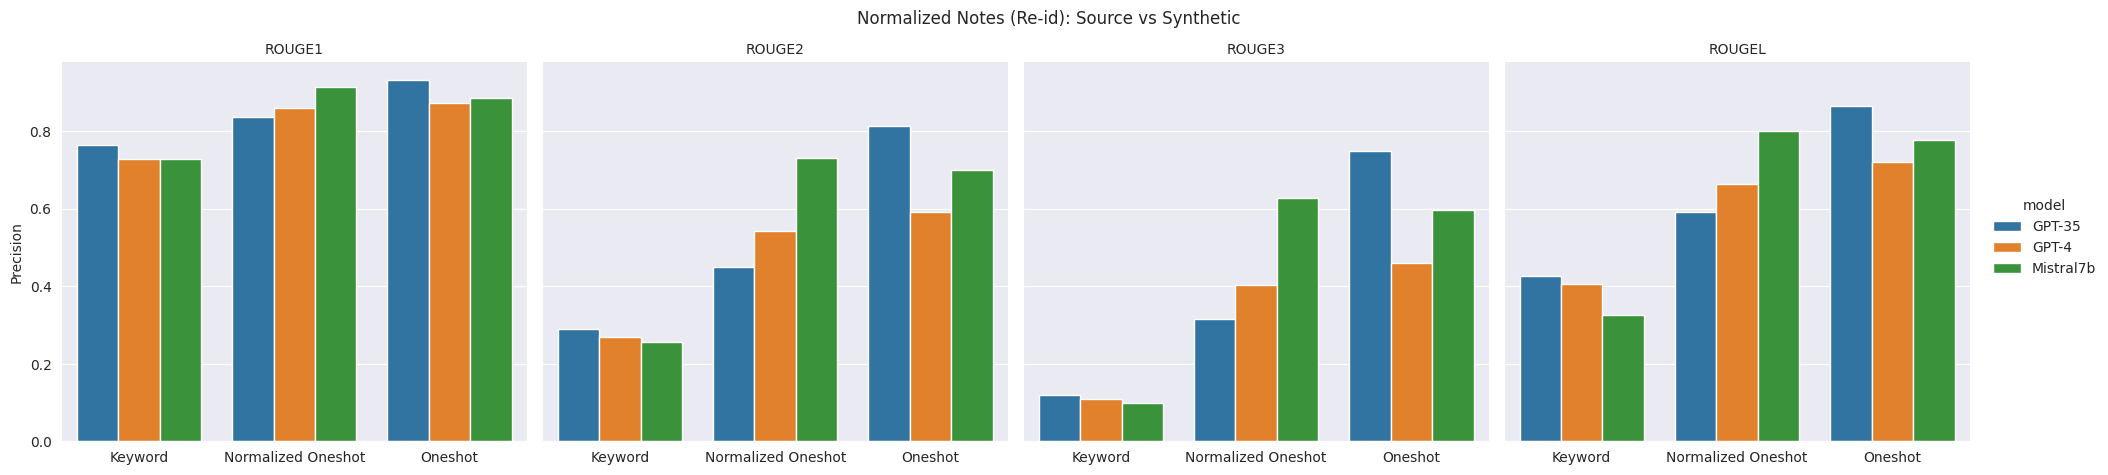

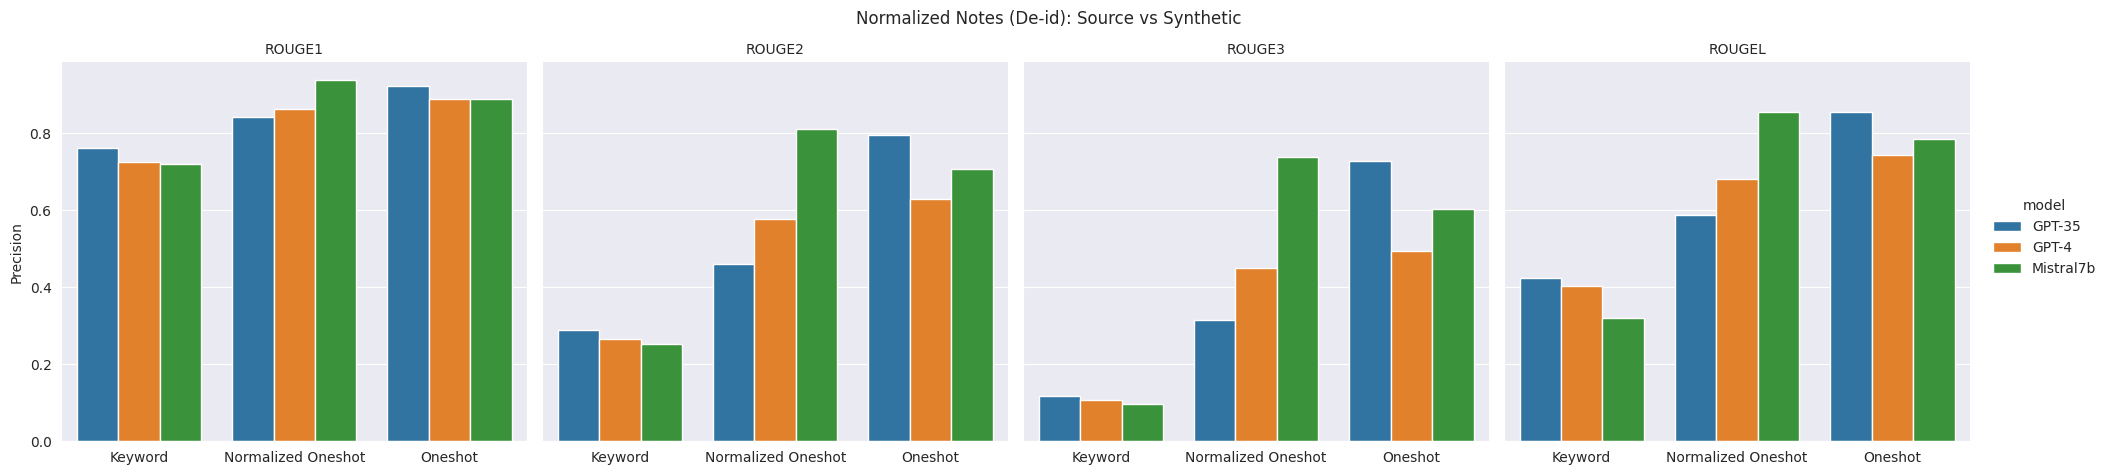

In [57]:
subdf = getSubdf('reid', normal_4k_df)
sns.set_style("darkgrid")
g = sns.catplot(data=subdf, kind="bar", x='gener_type', y=target_metrics, hue='model', col='rouge_type', aspect=1,)
g.set_axis_labels("", target_output_metrics)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.875) 
g.fig.suptitle('Normalized Notes (Re-id): Source vs Synthetic')

subdf = getSubdf('deid', normal_4k_df)
sns.set_style("darkgrid")
g = sns.catplot(data=subdf, kind="bar", x='gener_type', y=target_metrics, hue='model', col='rouge_type', aspect=1,)
g.set_axis_labels("", target_output_metrics)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.875) 
g.fig.suptitle('Normalized Notes (De-id): Source vs Synthetic')


## Calculate COS SIM

In [18]:
result_dir = r'./util_eval/cos_sim'
Path(result_dir).mkdir(parents=True, exist_ok=True)

In [6]:
# os.system("pip install sentence-transformers")

In [6]:
from sentence_transformers import SentenceTransformer, util

In [117]:
#     cos_sim = torch.nn.functional.cosine_similarity(embedding_1, embedding_2, dim=1)

In [7]:
sent_trans_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2', device=device)

In [8]:
# pip install -U sentence-transformers
sentences = ["I'm not happy", "I'm full of happiness"]
def get_similiarity(sent_1, sent_2):
    #Compute embedding for both lists
    embedding_1= sent_trans_model.encode(sent_1, convert_to_tensor=True).to(device)
    embedding_2 = sent_trans_model.encode(sent_2, convert_to_tensor=True).to(device)
    
    return util.pytorch_cos_sim(embedding_1, embedding_2)
    ## tensor([[0.6003]])
# val = get_similiarity(*sentences)
# print(val, val.item())

### Syn notes vs src notes

In [13]:
# for data_type in data_type_ls:
# # data_type = 'deid'
data_type = 'reid'
src_note_dir = src_data_dict[data_type]
for generation_type in generation_ls:
    for model in model_ls:
        task_name = f'{data_type}_{generation_type}_{model}'
        print(task_name)
        result_pickle_fp = os.path.join(result_dir, f'{task_name}.pickle')
        if os.path.exists(result_pickle_fp): continue
        
        prompt_dir = os.path.join( root, f'src_{data_type}',OUTPUT_DIR)
        generation_dir = os.path.join(prompt_dir, generation_type, model)
        
        syn_fls = [f'{icd9_abbr}_{fn}' for icd9_abbr in icd9obj.ICD9_ABBR_LS for fn in os.listdir(os.path.join(generation_dir, icd9_abbr))]
        # prep for dataframe
        col_name = 'cos_sim'
        df = pd.DataFrame(index=syn_fls, columns=[col_name])

        for syn_comb in tqdm(syn_fls):
            syn_icd9_abbr,_, syn_fn = syn_comb.split('_')
            # read SRC fn
            with open(os.path.join(src_note_dir, syn_icd9_abbr, syn_fn), 'r', encoding='utf-8') as fr:
                src_corpus = fr.read()
            # read SYN fn
            with open(os.path.join(generation_dir, syn_icd9_abbr, f'syn_{syn_fn}'), 'r', encoding='utf-8') as fr:
                syn_corpus = fr.read()
                
            df.loc[syn_comb, col_name] = get_similiarity(src_corpus, syn_corpus).item()
            
        writePickle(result_pickle_fp, df)
        lineMSG(f'72\nCheck on COS SIM {task_name} done!')

reid_one_shot_gpt-35-turbo-a0301


100%|███████████████████████████████████████| 9804/9804 [05:35<00:00, 29.23it/s]


reid_one_shot_gpt-4-0613


100%|███████████████████████████████████████| 9806/9806 [04:52<00:00, 33.49it/s]


reid_one_shot_Mistral7b


100%|███████████████████████████████████████| 9817/9817 [05:28<00:00, 29.87it/s]


reid_keyword_gpt-35-turbo-a0301


100%|███████████████████████████████████████| 9812/9812 [05:01<00:00, 32.58it/s]


reid_keyword_gpt-4-0613


100%|███████████████████████████████████████| 9810/9810 [05:12<00:00, 31.40it/s]


reid_keyword_Mistral7b


100%|███████████████████████████████████████| 9817/9817 [05:13<00:00, 31.36it/s]


reid_one_shot_src_gpt-35-turbo-a0301


100%|███████████████████████████████████████| 9796/9796 [04:43<00:00, 34.60it/s]


reid_one_shot_src_gpt-4-0613


100%|███████████████████████████████████████| 9815/9815 [05:03<00:00, 32.37it/s]


reid_one_shot_src_Mistral7b


100%|███████████████████████████████████████| 9817/9817 [05:26<00:00, 30.02it/s]


### Normalized + 4k: Syn text vs src text

In [ ]:
result_dir = os.path.join(r'./util_eval/cos_sim', NORMAL4K)
Path(result_dir).mkdir(parents=True, exist_ok=True)

In [14]:
prefix_str = 'Write a description of a patient using 2250 words containing the following phrases sequentially:\n'
postfix_str = '.\n###'
OUTPUT_DIR = 'output_csv_4k_n'
fls = ['valid.csv', 'train.csv', 'test.csv']

for data_type in data_type_ls:
# data_type = 'deid'
    for generation_type in generation_ls:
        for model in model_ls:
            task_name = f'{data_type}_{generation_type}_{model}'
            prompt_dir = os.path.join( root, f'src_{data_type}',OUTPUT_DIR)
            generation_dir = os.path.join(prompt_dir, generation_type, model, OUTPUT_DIR)
            # continue
            syn_df_ls = [os.path.exists(os.path.join(generation_dir, fn)) for fn in fls if 'ipynb' not in fn]
            print( all(syn_df_ls), task_name,)


True reid_one_shot_gpt-35-turbo-a0301
True reid_one_shot_gpt-4-0613
True reid_one_shot_Mistral7b
True reid_keyword_gpt-35-turbo-a0301
True reid_keyword_gpt-4-0613
True reid_keyword_Mistral7b
True reid_one_shot_src_gpt-35-turbo-a0301
True reid_one_shot_src_gpt-4-0613
True reid_one_shot_src_Mistral7b


In [19]:
# for data_type in data_type_ls:
# data_type = 'deid'
data_type = 'reid'
src_note_dir = src_data_dict[data_type]

src_output_dir = os.path.join( src_note_dir, OUTPUT_DIR)
src_df_ls = [pd.read_csv(os.path.join(src_output_dir, fn)) for fn in ['valid.csv', 'train.csv', 'test.csv'] if 'ipynb' not in fn]
src_df = pd.concat(src_df_ls, ignore_index=True)
del src_df_ls
src_df['icd9_fn'] = src_df['Three_Character_Labels'] + '_' + src_df['Admission_Id'].astype('str')+ '.txt'

for generation_type in generation_ls:
    for model in model_ls:
        task_name = f'{data_type}_{generation_type}_{model}'
        print(task_name)
        result_pickle_fp = os.path.join(result_dir, f'{task_name}.pickle')
        prompt_dir = os.path.join( root, f'src_{data_type}',OUTPUT_DIR)
        generation_dir = os.path.join(prompt_dir, generation_type, model, OUTPUT_DIR)
        # continue
        syn_df_ls = [pd.read_csv(os.path.join(generation_dir, fn)) for fn in ['valid.csv', 'train.csv', 'test.csv'] if 'ipynb' not in fn]
        syn_df = pd.concat(syn_df_ls, ignore_index=True)
        del syn_df_ls
        syn_df['icd9_fn'] = syn_df['Three_Character_Labels'] + '_' + syn_df['Admission_Id'].astype('str')+ '.txt'
        # prep for dataframe
        col_name = 'cos_sim'
        df = pd.DataFrame(index=syn_df.icd9_fn.to_list(), columns=[col_name])
        
        for i in tqdm(range(syn_df.shape[0])):
            syn_normal4k, icd9fn = syn_df.loc[i, ['Text', 'icd9_fn']]
            src_normal4k = src_df[src_df.icd9_fn == icd9fn]['Text'].values[0]
            df.loc[icd9fn, col_name] = get_similiarity(src_normal4k, syn_normal4k).item()

        writePickle(result_pickle_fp, df)
        lineMSG(f'72\nCheck on COS 4k {task_name} done!')

deid_one_shot_gpt-35-turbo-a0301_nor4k_txt


100%|████████████████████████████████████████████████████████████████████████████| 9798/9798 [04:07<00:00, 39.53it/s]


deid_one_shot_gpt-4-0613_nor4k_txt


100%|████████████████████████████████████████████████████████████████████████████| 9809/9809 [03:50<00:00, 42.55it/s]


deid_one_shot_Mistral7b_nor4k_txt


100%|████████████████████████████████████████████████████████████████████████████| 9817/9817 [04:16<00:00, 38.28it/s]


deid_keyword_gpt-35-turbo-a0301_nor4k_txt


100%|████████████████████████████████████████████████████████████████████████████| 9808/9808 [03:38<00:00, 44.92it/s]


deid_keyword_gpt-4-0613_nor4k_txt


100%|████████████████████████████████████████████████████████████████████████████| 9809/9809 [03:25<00:00, 47.82it/s]


deid_keyword_Mistral7b_nor4k_txt


100%|████████████████████████████████████████████████████████████████████████████| 9817/9817 [03:43<00:00, 43.94it/s]


deid_one_shot_src_gpt-35-turbo-a0301_nor4k_txt


100%|████████████████████████████████████████████████████████████████████████████| 9810/9810 [04:02<00:00, 40.52it/s]


deid_one_shot_src_gpt-4-0613_nor4k_txt


100%|████████████████████████████████████████████████████████████████████████████| 9799/9799 [03:20<00:00, 48.87it/s]


deid_one_shot_src_Mistral7b_nor4k_txt


100%|████████████████████████████████████████████████████████████████████████████| 9817/9817 [03:36<00:00, 45.27it/s]


### Print 

In [19]:
result_dir = r'./util_eval/cos_sim'; data_source_title = 'Full Notes: Source vs Synthetic'
# result_dir = os.path.join(r'./util_eval/cos_sim/normal4k/'); data_source_title = 'Source vs Synthetic [Normalized + 4K]'
fls = [fp for fp in glob(os.path.join(result_dir, '*.pickle')) ]
fls.sort(reverse=True)
len(fls)

18

In [20]:
collect = []
for pk_fn in fls[:]:
    fn = os.path.basename(pk_fn).replace('.pickle', '')
    data_type, gener_type, model = getCategory(fn)
    df = loadPickle(pk_fn)
    collect.append([data_type, gener_type, model, df.cos_sim.mean(), df.cos_sim.std()])

df = pd.DataFrame(collect, columns=['data_type', 'gener_type', 'model', 'cos_sim', 'std'])
df = df.sort_values(['data_type', 'gener_type', 'model'])
df.loc[df.gener_type == 'Normalized Oneshot', 'gener_type'] = 'Normalized One-shot'
df.loc[df.gener_type == 'Oneshot', 'gener_type'] = 'One-shot'

#### Single

In [156]:
data_type = 'reid'
df_part = df[df.data_type==data_type]

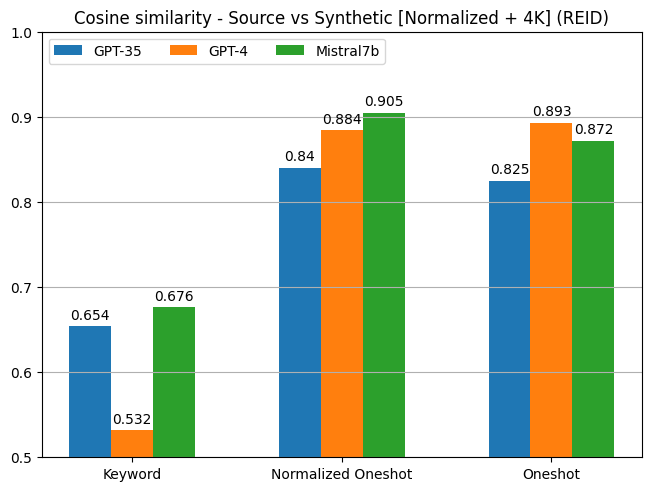

In [158]:
gener_type_ls = df_part.gener_type.unique()
model_dict = { model: [] for model in df_part.model.unique()}


for model in model_dict.keys():
    for gener_type in gener_type_ls:
        cos_val = df_part[(df_part['gener_type'] == gener_type) & 
                          (df_part['model'] == model)]['cos_sim'].to_list()[0]
        model_dict[model].append(round(cos_val,3))

# model_dict = {'GPT-35': [0.6896616838283189, 0.5586441195258074, 0.8145063939208513],
#  'GPT-4': [0.706329150065005, 0.7202161771052975, 0.7814678316766842],
#  'Mistral7b': [0.6564194224566127, 0.796991274040088, 0.8075084873374858]}

x = np.arange(len(gener_type_ls))  # the label locations
width = 0.20  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in model_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Cosine similarity')
ax.set_title(f'Cosine similarity - {data_source_title} ({data_type.upper()})')
ax.set_xticks(x + width, gener_type_ls)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0.5, 1)
ax.grid(axis='y')
plt.show()

#### Combine

RE-ID {'GPT-35': [0.69, 0.559, 0.815], 'GPT-4': [0.706, 0.72, 0.781], 'Mistral7b': [0.656, 0.797, 0.808]}
DE-ID {'GPT-35': [0.673, 0.545, 0.775], 'GPT-4': [0.698, 0.743, 0.78], 'Mistral7b': [0.65, 0.799, 0.786]}


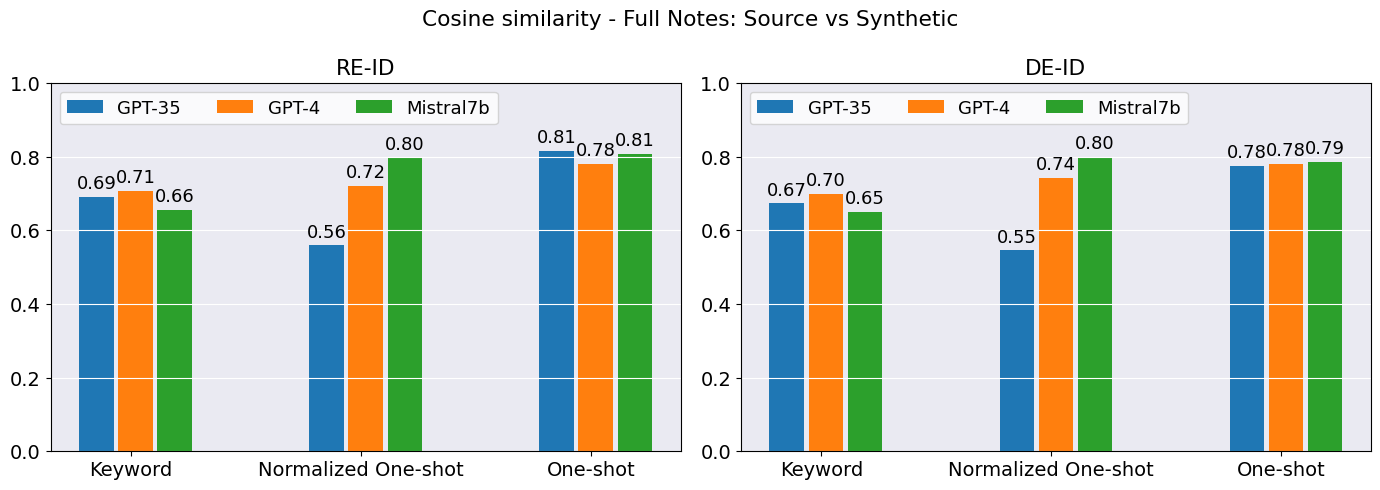

In [25]:
data_type_ls = ['reid', 'deid']
# Desired dimensions in pixels
width_in_pixels = 14000
height_in_pixels = 5000
dpi_val = 1000

# Calculate the figure size in inches
width_in_inches = width_in_pixels / dpi_val
height_in_inches = height_in_pixels / dpi_val

fig, axs = plt.subplots(1, 2, figsize=(width_in_inches, height_in_inches))#, layout='constrained')
plt.rcParams['font.size'] = 13
for idx in range(2):
    data_type = data_type_ls[idx]
    df_part = df[df.data_type==data_type]
    if data_type.casefold() == 'reid': 
        data_type = 'RE-ID'
    else: 
        data_type = 'DE-ID'
    
    gener_type_ls = df_part.gener_type.unique()
    model_dict = { model: [] for model in df_part.model.unique()}
    
    for model in model_dict.keys():
        for gener_type in gener_type_ls:
            cos_val = df_part[(df_part['gener_type'] == gener_type) & 
                              (df_part['model'] == model)]['cos_sim'].to_list()[0]
            model_dict[model].append(round(cos_val,3))
    print(data_type, model_dict)
    x = np.arange(len(gener_type_ls))  # the label locations
    width = 0.15  # the width of the bars
    distance = 0.02
    ax = axs[idx]
    ax.set_facecolor('#EAEAF2')
    multiplier = 0
    for attribute, measurement in model_dict.items():
        offset = (width + distance) * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, fmt='%.2f')
        multiplier += 1
        
        ax.set_title(data_type)
        ax.set_xticks(x + width, gener_type_ls)
        ax.legend(loc='upper left', ncols=3)
        ax.set_ylim(0, 1)
        ax.grid(color='w', axis='y')
plt.suptitle(f'Cosine similarity - {data_source_title}')
plt.tight_layout()

plt.savefig('cos_sim.tif', format='tif', dpi=500)
plt.show()

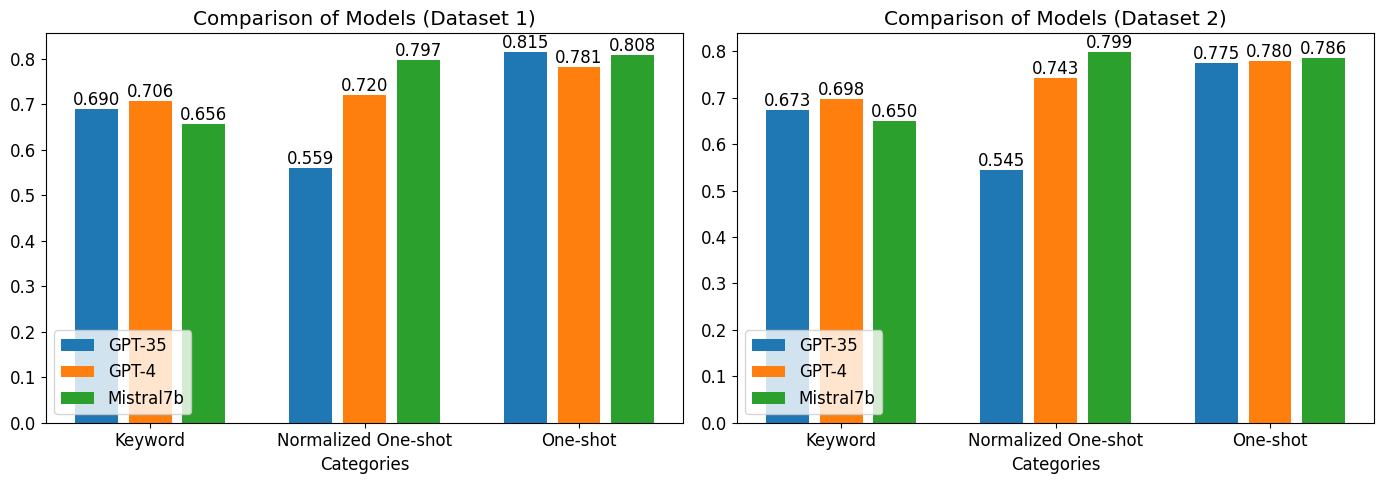

In [73]:
# Adjusting the code to add labels on each bar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Small distance between bars
bar_width = 0.2
distance = 0.05
index = range(len(categories))

# Plotting the first dataset with a small distance between bars and adding bar labels
for i, (key, values) in enumerate(data1.items()):
    bars = ax1.bar([x + (bar_width + distance) * i for x in index], values, bar_width, label=key)
    for bar in bars:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')
ax1.set_xlabel('Categories')
ax1.set_title('Comparison of Models (Dataset 1)')
ax1.set_xticks([x + (bar_width + distance) * (len(data1) - 1) / 2 for x in index])
ax1.set_xticklabels(categories)
ax1.legend()

# Plotting the second dataset with a small distance between bars and adding bar labels
for i, (key, values) in enumerate(data2.items()):
    bars = ax2.bar([x + (bar_width + distance) * i for x in index], values, bar_width, label=key)
    for bar in bars:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')
ax2.set_xlabel('Categories')
ax2.set_title('Comparison of Models (Dataset 2)')
ax2.set_xticks([x + (bar_width + distance) * (len(data2) - 1) / 2 for x in index])
ax2.set_xticklabels(categories)
ax2.legend()

plt.tight_layout()
plt.show()


In [8]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np


# BERT-Score

In [4]:
from evaluate import load
bertscore = load("bertscore")

In [5]:
from transformers import DebertaV2Tokenizer
token_model = "microsoft/deberta-v3-base"

tokenizer = DebertaV2Tokenizer.from_pretrained(token_model)
tokenizer("Hello world")["input_ids"]

[1, 5365, 447, 2]

In [6]:
def getCorrectLen(text):
    input_id = tokenizer(text)['input_ids']
    if(len(input_id) > 4000): #1500
        input_id=input_id[:4000] #1500
        text = tokenizer.decode(input_id)
    return text

In [24]:

# predictions = ["hello world", "general kenobi"]
# references = ["goodnight moon", "the sun is shining"]
# results = bertscore.compute(predictions=predictions, references=references, num_layers=9, model_type="microsoft/deberta-v3-base")
# print(results)

### Syn notes vs src notes

In [7]:
result_dir = r'./util_eval/bert_score'
Path(result_dir).mkdir(parents=True, exist_ok=True)

col_ls = ['precision', 'recall', 'f1']
prefix_str = 'Write a description of a patient using 2250 words containing the following phrases sequentially:\n'
postfix_str = '.\n###'

In [ ]:
# for data_type in data_type_ls:
# data_type = 'deid'
data_type = 'reid'
src_note_dir = src_data_dict[data_type]
for generation_type in generation_ls:
    for model in model_ls:
        task_name = f'{data_type}_{generation_type}_{model}'
        print(task_name)
        output_pickle_fp = os.path.join(result_dir, f'{task_name}.pickle')
        
        prompt_dir = os.path.join( root, f'src_{data_type}',OUTPUT_DIR)
        generation_dir = os.path.join(prompt_dir, generation_type, model)
        syn_fls = [f'{icd9_abbr}_{fn}' for icd9_abbr in icd9obj.ICD9_ABBR_LS for fn in os.listdir(os.path.join(generation_dir, icd9_abbr))]
        # prep for dataframe
        df = pd.DataFrame(index=syn_fls)
        
        for syn_comb in tqdm(syn_fls):
            syn_icd9_abbr,_, syn_fn = syn_comb.split('_')
            # read SRC fn
            with open(os.path.join(src_note_dir, syn_icd9_abbr, syn_fn), 'r', encoding='utf-8') as fr:
                src_corpus = getCorrectLen(fr.read())

            # read SYN fn
            with open(os.path.join(generation_dir, syn_icd9_abbr, f'syn_{syn_fn}'), 'r', encoding='utf-8') as fr:
                syn_corpus = getCorrectLen(fr.read())

            results = bertscore.compute(predictions=[syn_corpus], references=[src_corpus], batch_size=1,
                                        num_layers=9, model_type="microsoft/deberta-v3-base")
            for col in col_ls:
                df.loc[syn_comb, col] = results[col][0]

        writePickle(output_pickle_fp, df)
        lineMSG(f'72\nCheck on similarity {task_name} done!')

reid_one_shot_gpt-35-turbo-a0301


  1%|▍                                                                             | 58/9804 [00:17<43:56,  3.70it/s]

### Normalized + 4k: Syn text vs src text

In [10]:
result_dir = os.path.join(r'./util_eval/bert_score', NORMAL4K)
Path(result_dir).mkdir(parents=True, exist_ok=True)

col_ls = ['precision', 'recall', 'f1']
prefix_str = 'Write a description of a patient using 2250 words containing the following phrases sequentially:\n'
postfix_str = '.\n###'

In [ ]:
# for data_type in data_type_ls:
#     data_type = 'deid'
data_type = 'reid'
src_note_dir = src_data_dict[data_type]

src_output_dir = os.path.join( src_note_dir, OUTPUT_DIR)
src_df_ls = [pd.read_csv(os.path.join(src_output_dir, fn)) for fn in ['valid.csv', 'train.csv', 'test.csv'] if 'ipynb' not in fn]
src_df = pd.concat(src_df_ls, ignore_index=True)
del src_df_ls
src_df['icd9_fn'] = src_df['Three_Character_Labels'] + '_' + src_df['Admission_Id'].astype('str')+ '.txt'

for generation_type in generation_ls:
    for model in model_ls:
        task_name = f'{data_type}_{generation_type}_{model}'
        print(task_name)
        output_pickle_fp = os.path.join(result_dir, f'{task_name}.pickle')
        
        prompt_dir = os.path.join( root, f'src_{data_type}',OUTPUT_DIR)
        generation_dir = os.path.join(prompt_dir, generation_type, model, OUTPUT_DIR)
        # continue
        syn_df_ls = [pd.read_csv(os.path.join(generation_dir, fn)) for fn in ['valid.csv', 'train.csv', 'test.csv'] if 'ipynb' not in fn]
        syn_df = pd.concat(syn_df_ls, ignore_index=True)
        del syn_df_ls
        syn_df['icd9_fn'] = syn_df['Three_Character_Labels'] + '_' + syn_df['Admission_Id'].astype('str')+ '.txt'
        # prep for dataframe
        df = pd.DataFrame(index=syn_df.icd9_fn.to_list())

        for i in tqdm(range(syn_df.shape[0])):
            syn_normal4k, icd9fn = syn_df.loc[i, ['Text', 'icd9_fn']]
            src_normal4k = src_df[src_df.icd9_fn == icd9fn]['Text'].values[0]
            syn_normal4k = getCorrectLen(syn_normal4k)
            src_normal4k = getCorrectLen(src_normal4k)
            
            results = bertscore.compute(predictions=[syn_normal4k], references=[src_normal4k], batch_size=1,
                                        num_layers=9, model_type="microsoft/deberta-v3-base")
            for col in col_ls:
                df.loc[icd9fn, col] = results[col][0]
            
        writePickle(output_pickle_fp, df)
        lineMSG(f'72\nCheck on similarity {task_name} done!')

reid_one_shot_gpt-35-turbo-a0301


  3%|██                                                                           | 259/9802 [00:44<20:46,  7.65it/s]

In [14]:
# writePickle(output_pickle_fp, df)

In [ ]:
# Print Result

In [61]:
result_dir = r'./util_eval/bert_score'
# result_dir = os.path.join(r'./util_eval/rouge/', NORMAL4K)
fls = glob(os.path.join(result_dir, '*.pickle'))
fls.sort(reverse=True)
fls

['./util_eval/bert_score/reid_one_shot_src_gpt-4-0613.pickle',
 './util_eval/bert_score/reid_one_shot_src_gpt-35-turbo-a0301.pickle',
 './util_eval/bert_score/reid_one_shot_src_Mistral7b.pickle',
 './util_eval/bert_score/reid_one_shot_gpt-4-0613.pickle',
 './util_eval/bert_score/reid_one_shot_gpt-35-turbo-a0301.pickle',
 './util_eval/bert_score/reid_one_shot_Mistral7b.pickle',
 './util_eval/bert_score/reid_keyword_gpt-4-0613.pickle',
 './util_eval/bert_score/reid_keyword_gpt-35-turbo-a0301.pickle',
 './util_eval/bert_score/reid_keyword_Mistral7b.pickle',
 './util_eval/bert_score/deid_one_shot_src_gpt-4-0613.pickle',
 './util_eval/bert_score/deid_one_shot_src_gpt-35-turbo-a0301.pickle',
 './util_eval/bert_score/deid_one_shot_src_Mistral7b.pickle',
 './util_eval/bert_score/deid_one_shot_gpt-4-0613.pickle',
 './util_eval/bert_score/deid_one_shot_gpt-35-turbo-a0301.pickle',
 './util_eval/bert_score/deid_one_shot_Mistral7b.pickle',
 './util_eval/bert_score/deid_keyword_gpt-4-0613.pickle',
 

In [71]:
collect = []
for pk_fn in fls[:]:
    fn = os.path.basename(pk_fn).replace('.pickle', '')
    data_type, gener_type, model = getCategory(fn)
    df = loadPickle(pk_fn)
    collect.append([data_type, gener_type, model, df.precision.mean(), df.precision.std(), df.recall.mean(), df.recall.std(), df.f1.mean(), df.f1.std()])
df = pd.DataFrame(collect, columns=['data_type', 'gener_type', 'model', 'precision', 'p-std', 'recall', 'r-std', 'f1', 'f1-std'])

In [76]:
df = df.sort_values(['data_type', 'gener_type', 'model'])
# df

In [73]:
df.to_csv(os.path.join(result_dir, 'bert_score_df.csv'), index=False)

In [74]:
result_dir = os.path.join(r'./util_eval/bert_score', NORMAL4K)
fls = glob(os.path.join(result_dir, '*.pickle'))
fls.sort(reverse=True)
fls

['./util_eval/bert_score/normal4k/reid_one_shot_src_gpt-4-0613.pickle',
 './util_eval/bert_score/normal4k/reid_one_shot_src_gpt-35-turbo-a0301.pickle',
 './util_eval/bert_score/normal4k/reid_one_shot_src_Mistral7b.pickle',
 './util_eval/bert_score/normal4k/reid_one_shot_gpt-4-0613.pickle',
 './util_eval/bert_score/normal4k/reid_one_shot_gpt-35-turbo-a0301.pickle',
 './util_eval/bert_score/normal4k/reid_one_shot_Mistral7b.pickle',
 './util_eval/bert_score/normal4k/reid_keyword_gpt-4-0613.pickle',
 './util_eval/bert_score/normal4k/reid_keyword_gpt-35-turbo-a0301.pickle',
 './util_eval/bert_score/normal4k/reid_keyword_Mistral7b.pickle',
 './util_eval/bert_score/normal4k/deid_one_shot_src_gpt-4-0613.pickle',
 './util_eval/bert_score/normal4k/deid_one_shot_src_gpt-35-turbo-a0301.pickle',
 './util_eval/bert_score/normal4k/deid_one_shot_src_Mistral7b.pickle',
 './util_eval/bert_score/normal4k/deid_one_shot_gpt-4-0613.pickle',
 './util_eval/bert_score/normal4k/deid_one_shot_gpt-35-turbo-a0301.

In [78]:
collect = []
for pk_fn in fls[:]:
    fn = os.path.basename(pk_fn).replace('.pickle', '')
    data_type, gener_type, model = getCategory(fn)
    df = loadPickle(pk_fn)
    collect.append([data_type, gener_type, model, df.precision.mean(), df.precision.std(), df.recall.mean(), df.recall.std(), df.f1.mean(), df.f1.std()])
df = pd.DataFrame(collect, columns=['data_type', 'gener_type', 'model', 'precision', 'p-std', 'recall', 'r-std', 'f1', 'f1-std'])

In [79]:
df = df.sort_values(['data_type', 'gener_type', 'model'])
# df

In [80]:
df.to_csv(os.path.join(result_dir, 'bert_score_normal4k_df.csv'), index=False)

# BLEU

In [7]:
from nltk.translate import bleu

In [34]:
result = bleu([syn_normal4k.split()],
              src_normal4k.split(),
             (1,),
             )
result

0.7248034310221587

## Normalized + 4k: Syn text vs src text

In [8]:
result_dir = os.path.join( r'./util_eval/bleu', NORMAL4K)
Path(result_dir).mkdir(parents=True, exist_ok=True)

In [11]:
for data_type in data_type_ls:
    # data_type = 'deid'
    # data_type = 'reid'
    src_note_dir = src_data_dict[data_type]
    
    src_output_dir = os.path.join( src_note_dir, OUTPUT_DIR)
    src_df_ls = [pd.read_csv(os.path.join(src_output_dir, fn)) for fn in ['valid.csv', 'train.csv', 'test.csv'] if 'ipynb' not in fn]
    src_df = pd.concat(src_df_ls, ignore_index=True)
    del src_df_ls
    src_df['icd9_fn'] = src_df['Three_Character_Labels'] + '_' + src_df['Admission_Id'].astype('str')+ '.txt'
    
    for generation_type in generation_ls:
        for model in model_ls:
            task_name = f'{data_type}_{generation_type}_{model}'
            print(task_name)
            result_pickle_fp = os.path.join(result_dir, f'{task_name}.pickle')
            prompt_dir = os.path.join( root, f'src_{data_type}',OUTPUT_DIR)
            generation_dir = os.path.join(prompt_dir, generation_type, model, OUTPUT_DIR)
            # continue
            syn_df_ls = [pd.read_csv(os.path.join(generation_dir, fn)) for fn in ['valid.csv', 'train.csv', 'test.csv'] if 'ipynb' not in fn]
            syn_df = pd.concat(syn_df_ls, ignore_index=True)
            del syn_df_ls
            syn_df['icd9_fn'] = syn_df['Three_Character_Labels'] + '_' + syn_df['Admission_Id'].astype('str')+ '.txt'
            # prep for dataframe
            col_name = 'bleu'
            df = pd.DataFrame(index=syn_df.icd9_fn.to_list(), columns=[col_name])
            
            for i in tqdm(range(syn_df.shape[0])):
                syn_normal4k, icd9fn = syn_df.loc[i, ['Text', 'icd9_fn']]
                src_normal4k = src_df[src_df.icd9_fn == icd9fn]['Text'].values[0]
                df.loc[icd9fn, col_name] = bleu([syn_normal4k.split()],
                                                 src_normal4k.split(),
                                                 (1,), )
            writePickle(result_pickle_fp, df)
            lineMSG(f'72\nCheck on BLEU {task_name} done!')

reid_one_shot_gpt-35-turbo-a0301


100%|███████████████████████████████████████████████████████████████████████████| 9802/9802 [00:19<00:00, 510.60it/s]


reid_one_shot_gpt-4-0613


100%|███████████████████████████████████████████████████████████████████████████| 9806/9806 [00:19<00:00, 506.78it/s]


reid_one_shot_Mistral7b


100%|███████████████████████████████████████████████████████████████████████████| 9817/9817 [00:19<00:00, 510.97it/s]


reid_keyword_gpt-35-turbo-a0301


100%|███████████████████████████████████████████████████████████████████████████| 9812/9812 [00:18<00:00, 523.87it/s]


reid_keyword_gpt-4-0613


100%|███████████████████████████████████████████████████████████████████████████| 9810/9810 [00:18<00:00, 516.63it/s]


reid_keyword_Mistral7b


100%|███████████████████████████████████████████████████████████████████████████| 9817/9817 [00:18<00:00, 519.19it/s]


reid_one_shot_src_gpt-35-turbo-a0301


100%|███████████████████████████████████████████████████████████████████████████| 9782/9782 [00:18<00:00, 536.49it/s]


reid_one_shot_src_gpt-4-0613


100%|███████████████████████████████████████████████████████████████████████████| 3457/3457 [00:06<00:00, 530.35it/s]


reid_one_shot_src_Mistral7b


100%|███████████████████████████████████████████████████████████████████████████| 9817/9817 [00:18<00:00, 516.85it/s]


deid_one_shot_gpt-35-turbo-a0301


100%|███████████████████████████████████████████████████████████████████████████| 9798/9798 [00:20<00:00, 467.09it/s]


deid_one_shot_gpt-4-0613


100%|███████████████████████████████████████████████████████████████████████████| 9809/9809 [00:18<00:00, 518.50it/s]


deid_one_shot_Mistral7b


100%|███████████████████████████████████████████████████████████████████████████| 9817/9817 [00:19<00:00, 503.73it/s]


deid_keyword_gpt-35-turbo-a0301


100%|███████████████████████████████████████████████████████████████████████████| 9808/9808 [00:18<00:00, 518.86it/s]


deid_keyword_gpt-4-0613


100%|███████████████████████████████████████████████████████████████████████████| 9809/9809 [00:19<00:00, 505.94it/s]


deid_keyword_Mistral7b


100%|███████████████████████████████████████████████████████████████████████████| 9817/9817 [00:19<00:00, 514.60it/s]


deid_one_shot_src_gpt-35-turbo-a0301


100%|███████████████████████████████████████████████████████████████████████████| 9810/9810 [00:18<00:00, 536.36it/s]


deid_one_shot_src_gpt-4-0613


100%|███████████████████████████████████████████████████████████████████████████| 9799/9799 [00:18<00:00, 527.34it/s]


deid_one_shot_src_Mistral7b


100%|███████████████████████████████████████████████████████████████████████████| 9817/9817 [00:19<00:00, 515.65it/s]
